In [ ]:
# This is for some trial-and-error to see what focal lengths we might need

In [17]:
import matplotlib.pyplot as plt
import numpy as np

In [18]:
# si in terms of so and f

def si(so_pass,f_pass):
    
    si_result = np.divide(so_pass,np.subtract(np.divide(so_pass,f_pass),1.))
    
    return si_result

In [39]:
f_array = [12.7, 15., 16., 19., 20., 25.4, 33., 38.1, 40., 50., 
           50.2, 62.9, 75., 75.6, 88.3, 100.]

In [40]:
si_array = si(so_pass = so, f_pass = f_array)

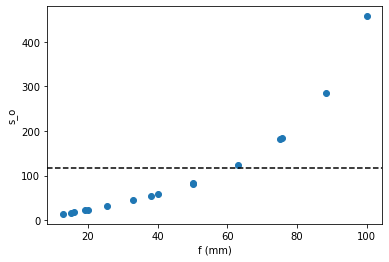

In [44]:
plt.scatter(f_array,si_array)
plt.xlabel("f (mm)")
plt.ylabel("s_o")
plt.axhline(y=116.05, color="k", linestyle="--")
plt.show()

In [45]:
print(si_array)

[ 14.09887251  16.99115044  18.28571429  22.31192661  23.7037037
  31.68810916  44.46315789  54.24694105  58.18181818  82.05128205
  82.59125964 123.67434716 181.13207547 184.67175573 284.69521411
 457.14285714]


In [46]:
# required movement of the detector
# movements of [0,+50] mm *should* be acceptable without requiring movement of the lens itself

resids_detector = np.subtract(si_array,116.05)

In [48]:
resids_candidates = np.subtract([82.,181.],116.05)

In [49]:
print(resids_candidates)

[-34.05  64.95]
